# üéØ Misi√≥n

Tu nueva misi√≥n es desarrollar modelos predictivos capaces de prever qu√© clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelaci√≥n, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

# 1. Importando librerias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score ,train_test_split, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

# 2. Extrayendo el archivo inicial tratado.

In [2]:
datos = pd.read_csv('telecomx.csv')
print(datos)
print(datos.columns)

       idCliente  Churn     genero  es_jubilado  tiene_pareja  \
0     0002-ORFBO  False   femenino        False          True   
1     0003-MKNFE  False  masculino        False         False   
2     0004-TLHLJ   True  masculino        False         False   
3     0011-IGKFF   True  masculino         True          True   
4     0013-EXCHZ   True   femenino         True          True   
...          ...    ...        ...          ...           ...   
7027  9987-LUTYD  False   femenino        False         False   
7028  9992-RRAMN   True  masculino        False          True   
7029  9992-UJOEL  False  masculino        False         False   
7030  9993-LHIEB  False  masculino        False          True   
7031  9995-HOTOH  False  masculino        False          True   

      tiene_dependientes  antiguedad  servicio_telefonico  multiples_lineas  \
0                   True           9                 True             False   
1                  False           9                 True    

# 3. Eliminaci√≥n de columnas irrelevantes.

In [3]:
# Eliminando idCliente, puesto que no va a aportar valor al analisis ni al modelo
datos = datos.drop(columns='idCliente', axis=1)

print(datos)
datos.info()

      Churn     genero  es_jubilado  tiene_pareja  tiene_dependientes  \
0     False   femenino        False          True                True   
1     False  masculino        False         False               False   
2      True  masculino        False         False               False   
3      True  masculino         True          True               False   
4      True   femenino         True          True               False   
...     ...        ...          ...           ...                 ...   
7027  False   femenino        False         False               False   
7028   True  masculino        False          True               False   
7029  False  masculino        False         False               False   
7030  False  masculino        False          True                True   
7031  False  masculino        False          True                True   

      antiguedad  servicio_telefonico  multiples_lineas servicio_internet  \
0              9                 True         

# 4. Selecci√≥n de las variables explicativas y la variable objetivo.

In [4]:
# variables explicativas
X = datos.drop(columns='Churn')
# variable respuesta
y = datos['Churn']

# 5. Encoding

In [5]:
columnas = X.columns


# Encoding
# Transforma las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un m√©todo de codificaci√≥n adecuado, como one-hot encoding.
preprocesador = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                        ['genero', 'es_jubilado', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'multiples_lineas', 'servicio_internet', 'servicio_seguridad',
                                        'servicio_backup', 'servicio_proteccion', 'servicio_soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'factura_digital', 'metodo_pago']),
                                        remainder='passthrough',
                                        sparse_threshold=0)

X = preprocesador.fit_transform(X)

df_codificado = pd.DataFrame(X, columns=preprocesador.get_feature_names_out(columnas))

# codificando la variable respuesta
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

df_codificado['Churn'] = y

print(df_codificado)
print(df_codificado.info())

      onehotencoder__genero_masculino  onehotencoder__es_jubilado_True  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 1.0                              0.0   
3                                 1.0                              1.0   
4                                 0.0                              1.0   
...                               ...                              ...   
7027                              0.0                              0.0   
7028                              1.0                              0.0   
7029                              1.0                              0.0   
7030                              1.0                              0.0   
7031                              1.0                              0.0   

      onehotencoder__tiene_pareja_True  \
0                                  1.0   
1                          

# 6. Verificaci√≥n de la proporci√≥n de Cancelaci√≥n (Churn)

In [6]:
# Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

print(datos['Churn'].value_counts())
print(datos['Churn'].value_counts(normalize=True)*100)
# Tasa de churn:
# False -> 73.42%
# True -> 26.57%

Churn
False    5163
True     1869
Name: count, dtype: int64
Churn
False    73.421502
True     26.578498
Name: proportion, dtype: float64


# 7. Balanceo de clases

In [7]:
# Balanceo de clases

oversample = SMOTE(random_state=82)

# 8. Normalizaci√≥n

In [8]:
# Normalizaci√≥n o estandarizaci√≥n

normalizacion = MinMaxScaler()

# 9. Analisis de correlaci√≥n

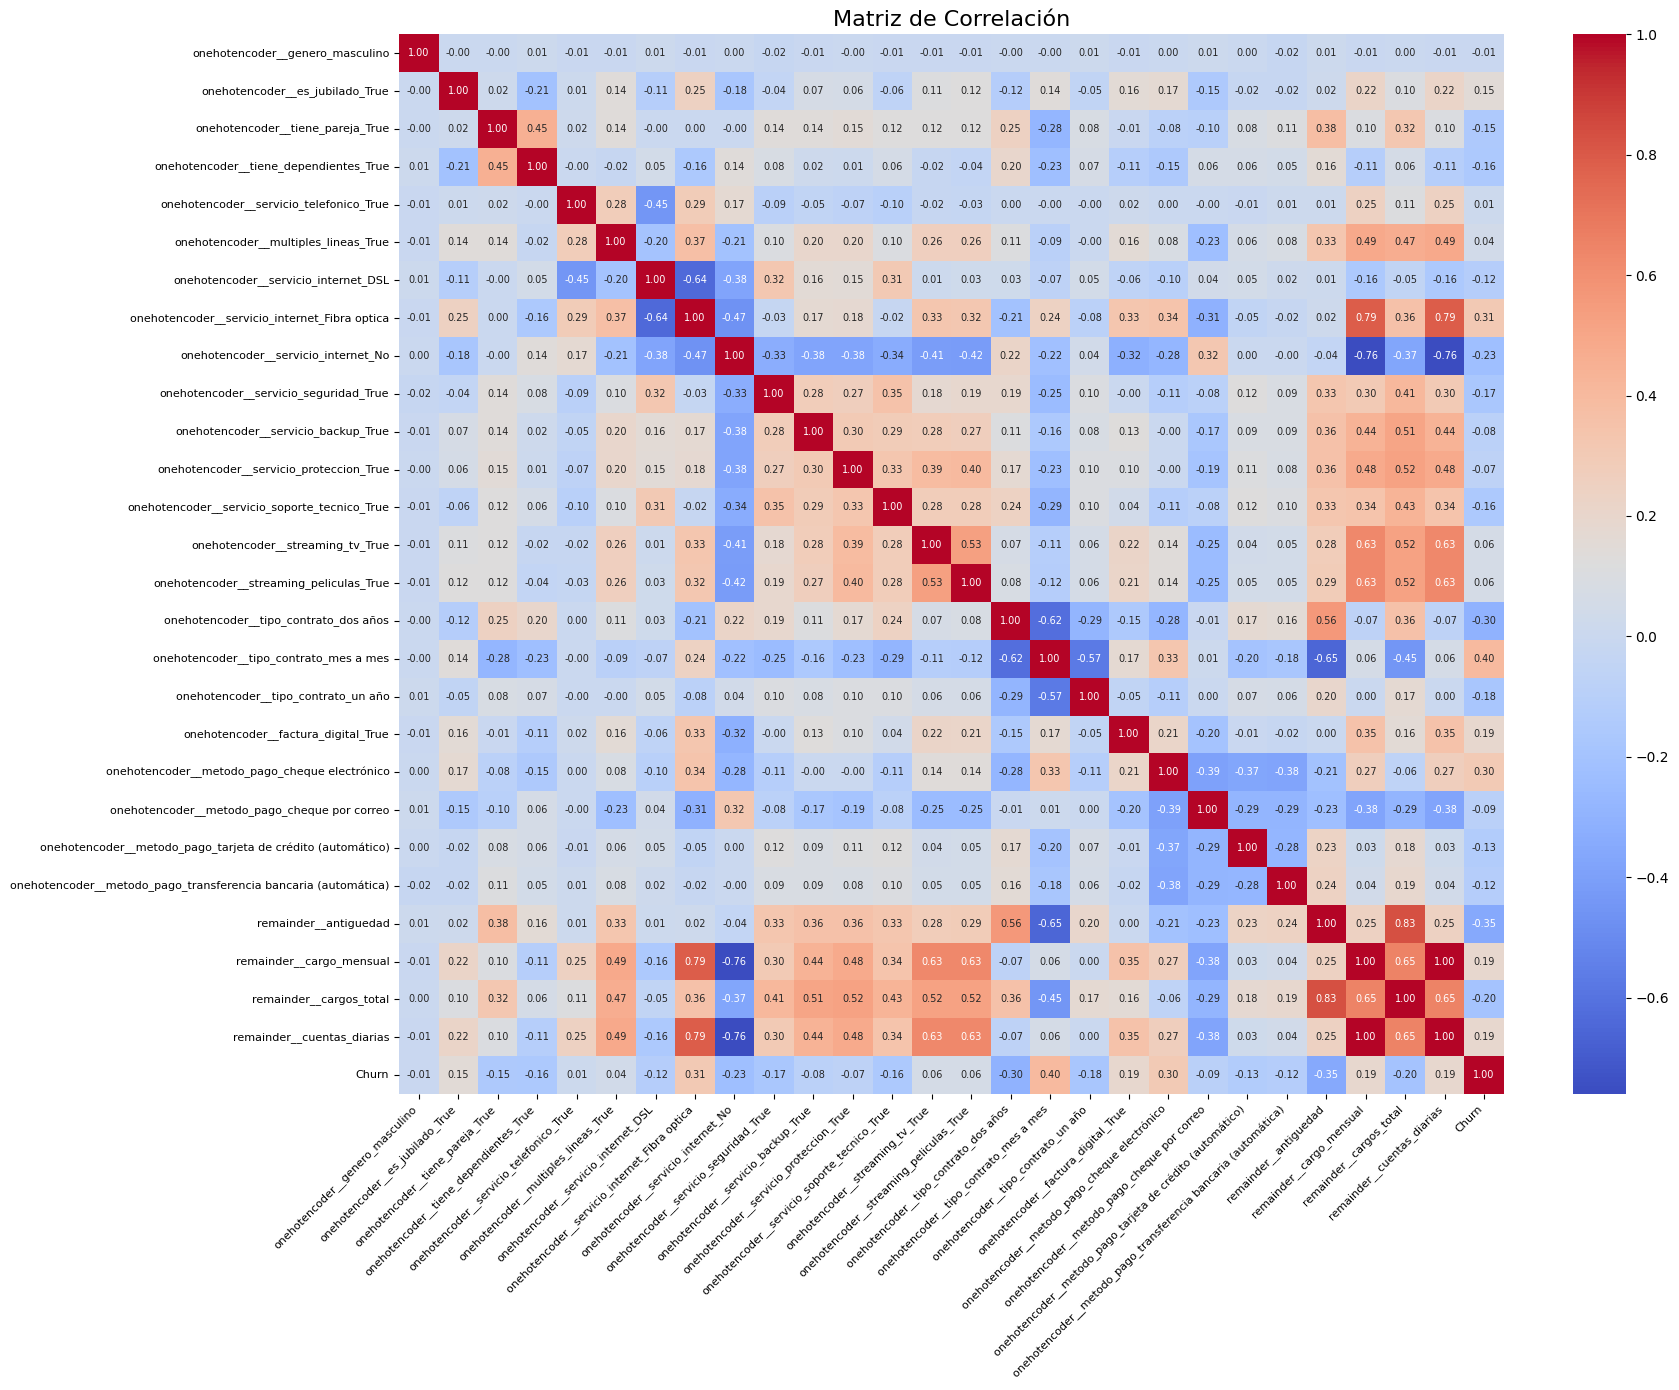

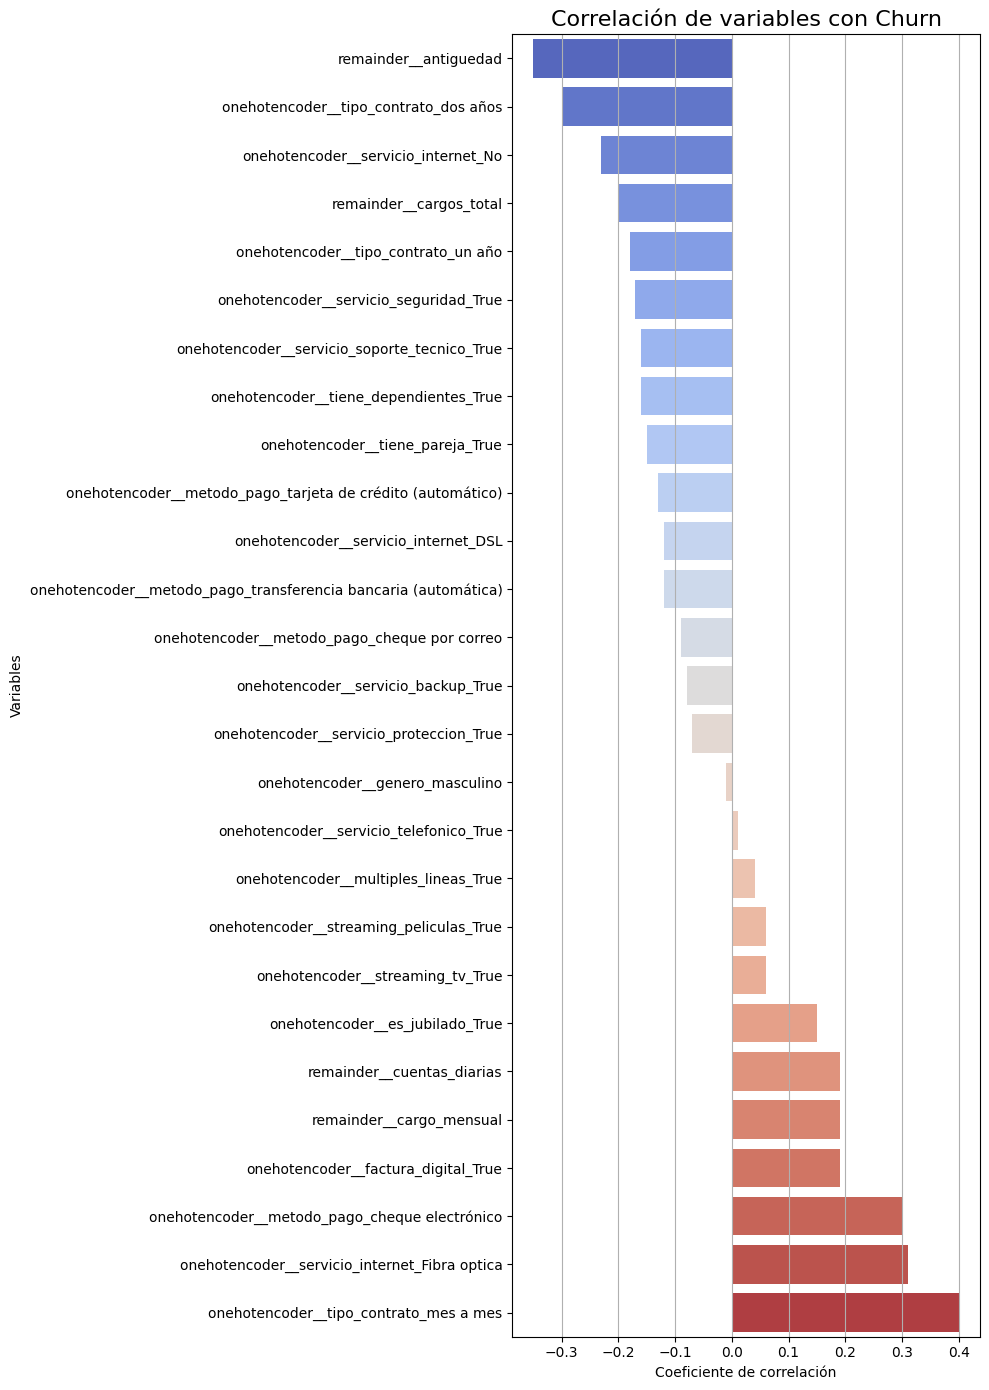

In [9]:
# Analisis de correlaci√≥n y multicolinearidad

corr = df_codificado.corr().round(2)

plt.figure(figsize=(18, 14))  # definimos el tama√±o de figura
sns.heatmap(corr,
            annot=True,         # mostramos los valores de correlaci√≥n dentro de cada celda
            fmt=".2f",
            cmap='coolwarm',    # paleta de colores
            annot_kws={"size": 7})  # reducimos el tama√±o del texto dentro de las celdas

plt.xticks(rotation=45, ha='right', fontsize=8)  # rotamos y achicamos los ticks del eje x
plt.yticks(fontsize=8)                           # tama√±o de fuente de los ticks del eje y
plt.title("Matriz de Correlaci√≥n", fontsize=16)
plt.tight_layout()
plt.show()

# Visualizando mejor las correlaciones con la variable Churn

corr = corr.drop(index='Churn').sort_values(by='Churn', ascending=True)

plt.figure(figsize=(10, 14))
sns.barplot(
    x='Churn',
    y=corr.index,
    data=corr,
    palette='coolwarm'
)
plt.title("Correlaci√≥n de variables con Churn", fontsize=16)
plt.xlabel("Coeficiente de correlaci√≥n")
plt.ylabel("Variables")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 10. Analisis dirigido

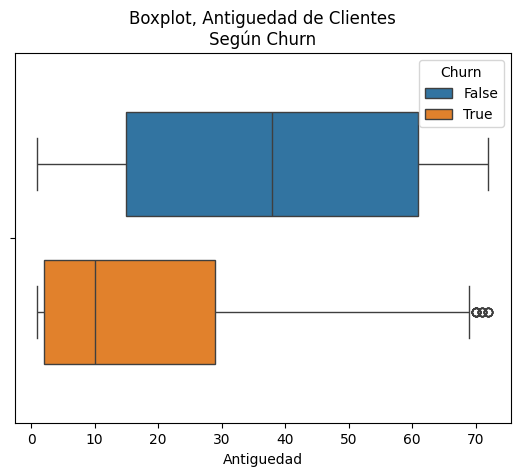

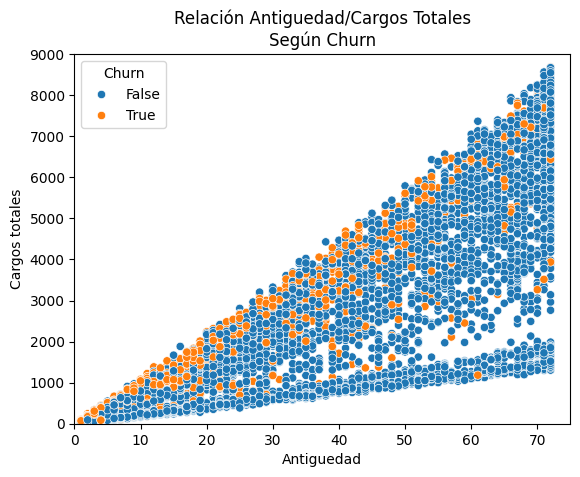

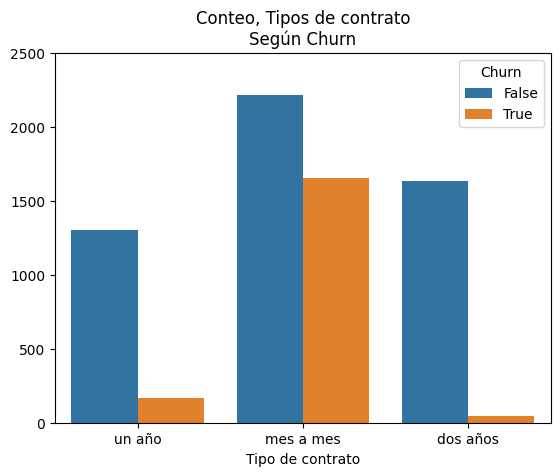

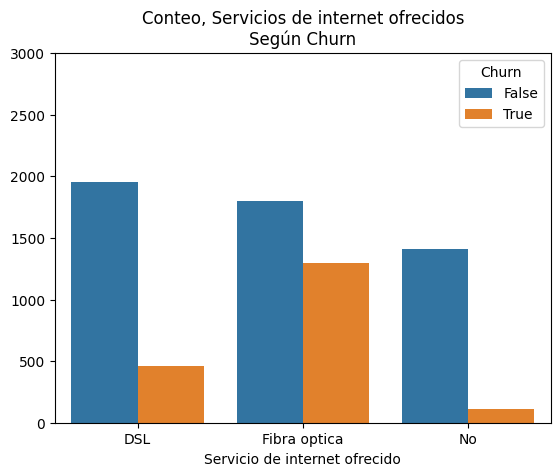

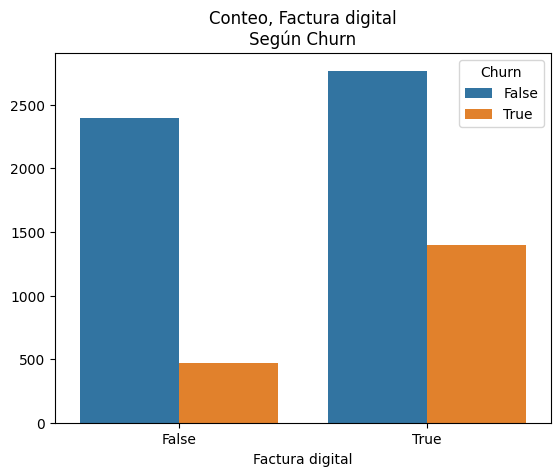

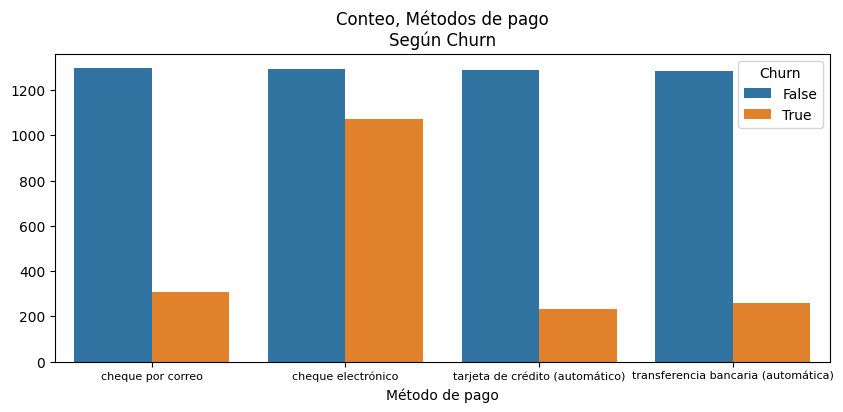

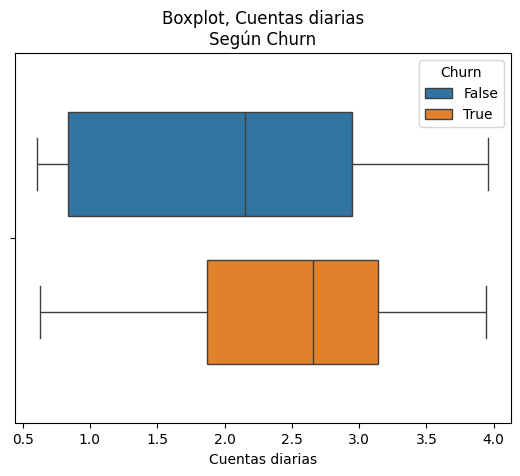

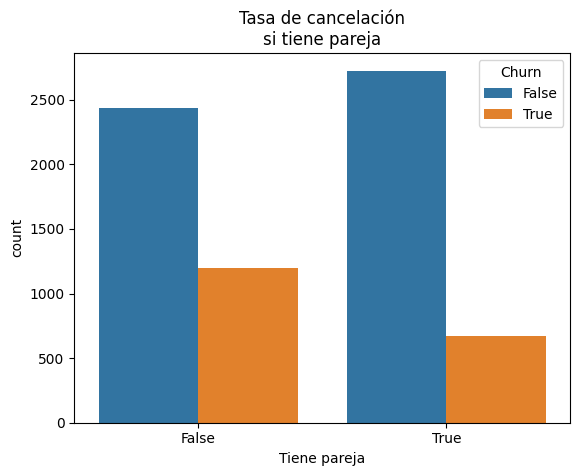

In [10]:
# Analisis dirigido

# REGLA DE STURGES
# k = 1 + (10/3) * np.log10(n)



# boxplot de la variable 'antiguedad' teniendo en cuenta el churn por cada cliente
sns.boxplot(data=datos, x='antiguedad', hue='Churn', gap=0.3)
plt.title('Boxplot, Antiguedad de Clientes\nSeg√∫n Churn')
plt.xlabel('Antiguedad')
plt.show()

#
sns.scatterplot(data=datos, x='antiguedad', y='cargos_total', hue='Churn')
plt.title('Relaci√≥n Antiguedad/Cargos Totales\nSeg√∫n Churn')
plt.xlabel('Antiguedad')
plt.ylabel('Cargos totales')
plt.xlim((0, 75))
plt.ylim((0, 9000))
plt.show()

# countplot de la variable 'tipo_contrato', teniendo en cuenta 'Churn'
sns.countplot(data=datos, x='tipo_contrato', hue='Churn')
plt.title('Conteo, Tipos de contrato\nSeg√∫n Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('')
plt.ylim((0, 2500))
plt.show()

# countplot de la variable 'servicio_internet', teniendo en cuenta 'Churn'
sns.countplot(data=datos, x='servicio_internet', hue='Churn')
plt.title('Conteo, Servicios de internet ofrecidos\nSeg√∫n Churn')
plt.xlabel('Servicio de internet ofrecido')
plt.ylim((0, 3000))
plt.ylabel('')
plt.show()

# countplot de la variable 'factura_digital', teniendo en cuenta 'Churn'
sns.countplot(data=datos, x='factura_digital', hue='Churn')
plt.title('Conteo, Factura digital\nSeg√∫n Churn')
plt.xlabel('Factura digital')
plt.ylabel('')
plt.show()

# countplot de la variable 'metodo_pago', teniendo en cuenta 'Churn'
plt.figure(figsize=(10, 4))
sns.countplot(data=datos, x='metodo_pago', hue='Churn')
plt.title('Conteo, M√©todos de pago\nSeg√∫n Churn')
plt.xlabel('M√©todo de pago')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.show()

# boxplot de cuentas diarias, teniendo en cuenta 'Churn'
sns.boxplot(data=datos, x='cuentas_diarias', hue='Churn', gap=0.3)
plt.title('Boxplot, Cuentas diarias\nSeg√∫n Churn')
plt.xlabel('Cuentas diarias')
plt.show()

# countplot con la tasa de cancelaci√≥n seg√∫n tenga pareja el cliente o no
sns.countplot(data=datos, x='tiene_pareja', hue='Churn')
plt.title('Tasa de cancelaci√≥n\nsi tiene pareja')
plt.xlabel('Tiene pareja')
plt.show()

# 11. Separaci√≥n de datos

In [11]:
# Separaci√≥n de datos

# antiguedad, correlaci√≥n negativa
# contrato dos a√±os, correlaci√≥n negativa
# cargos total, correlaci√≥n negativa
# no servicio internet, correlaci√≥n negativa
# cargos totales, correlaci√≥n negativa

# contrato mes a mes, correlaci√≥n positiva
# fibra optica, correlaci√≥n positiva
# cheque electronico, correlaci√≥n positiva
# mensual, cuentas diarias, factura digital true, correlacion positiva

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=82)

# Balanceo de clases

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# 12. Creaci√≥n de modelos

In [ ]:
# CREACION DE MODELOS

# Baseline

dummy = DummyClassifier()
dummy.fit(X_train_smote, y_train_smote)
print(dummy.score(X_test, y_test))

# DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2)
modelo_arbol.fit(X_train_smote, y_train_smote)

# RandomForestClassifier

modelo_forest = RandomForestClassifier(max_depth=5, random_state=82, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
modelo_forest.fit(X_train_smote, y_train_smote)

# KNeighborsClassifier

X_train_normalize = normalizacion.fit_transform(X_train_smote)
X_test_normalize = normalizacion.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_normalize, y_train_smote)

0.7341862117981521


KNeighborsClassifier()

# 13. Evaluaci√≥n de los modelos

## 1.1 Validaci√≥n Cruzada


In [13]:
# Validaci√≥n cruzada

def intervalo_confianza(validacion, nombreModelo):
  promedio = validacion.mean()
  std = validacion.std()
  return f'intervalo de confianza, modelo {nombreModelo}: [{promedio - (2*std)}, {min((promedio + (2*std)), 1)}]'

stratkf = StratifiedKFold(n_splits=5, random_state=82, shuffle=True)

pipeline = Pipeline([('oversample', SMOTE()), ('arbol', modelo_arbol)])
validacion = cross_val_score(pipeline, X_temp, y_temp, cv=stratkf, scoring='recall') # evaluamos la metrica recall (sensibilidad)

print(intervalo_confianza(validacion, 'arbol'))

pipeline = Pipeline([('oversample', SMOTE()), ('forest', modelo_forest)])
validacion = cross_val_score(pipeline, X_temp, y_temp, cv=stratkf, scoring='recall')
print(intervalo_confianza(validacion, 'forest'))

pipeline = Pipeline([('oversample', SMOTE()), ('knn', knn)])
validacion = cross_val_score(pipeline, X_temp, y_temp, cv=stratkf, scoring='recall')
print(intervalo_confianza(validacion, 'knn'))

intervalo de confianza, modelo arbol: [0.4309584592670841, 0.818539868492113]
intervalo de confianza, modelo forest: [0.702632652081554, 0.8251265452428609]
intervalo de confianza, modelo knn: [0.5935456648782881, 0.7000998200715448]


## 1.2 Metricas de evaluaci√≥n

{'Accuracy': 0.7548, 'F1': 0.623, 'Recall': 0.762, 'Precision': 0.5268}


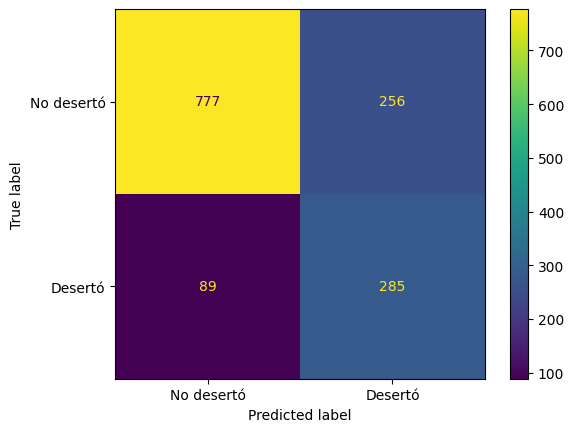

{'Accuracy': 0.7477, 'F1': 0.6007, 'Recall': 0.7139, 'Precision': 0.5184}


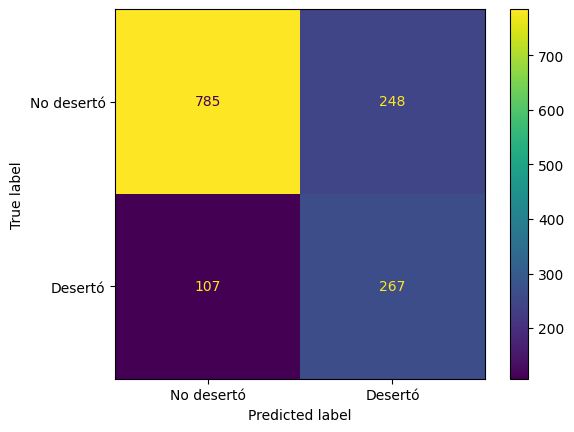

{'Accuracy': 0.6752, 'F1': 0.5303, 'Recall': 0.6898, 'Precision': 0.4307}


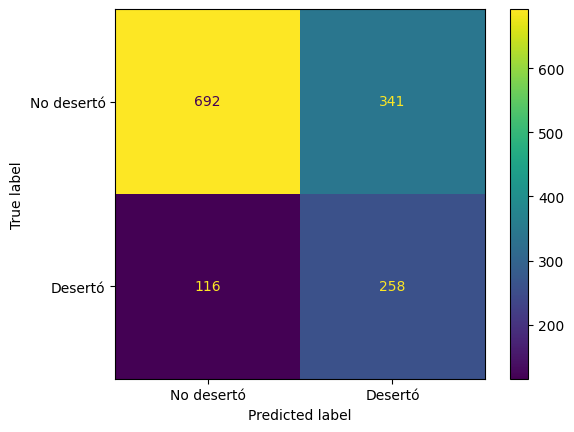

In [14]:
# Metricas de evaluaci√≥n

def calcularMetricas(y_true ,y_pred):
  accuracy = accuracy_score(y_val, y_pred)
  f1 = f1_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  metricas = {'Accuracy': round(accuracy, 4),
              'F1': round(f1, 4),
              'Recall': round(recall, 4),
              'Precision': round(precision, 4)}
  return metricas

# Matriz de confusi√≥n
def matriz_confusion(y_true, y_pred):
  matriz = confusion_matrix(y_val, y_pred)
  visualizer = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No desert√≥', 'Desert√≥'])
  return visualizer.plot()

# modelo arbol
y_pred = modelo_arbol.predict(X_val)
print(calcularMetricas(y_val ,y_pred))

visualizer = matriz_confusion(y_val, y_pred)
plt.show()

# modelo forest
y_pred = modelo_forest.predict(X_val)
print(calcularMetricas(y_val ,y_pred))

visualizer = matriz_confusion(y_val, y_pred)
plt.show()

# modelo knn
X_val_normalize = normalizacion.transform(X_val)
y_pred = knn.predict(X_val_normalize)
print(calcularMetricas(y_val ,y_pred))

visualizer = matriz_confusion(y_val, y_pred)
plt.show()


## 1.3 Rendimiento de los modelos

In [15]:
# Score con los datos de entrenamiento
print(modelo_arbol.score(X_train_smote, y_train_smote))
print(modelo_forest.score(X_train_smote, y_train_smote))
print(knn.score(X_train_normalize, y_train_smote))

print('\n')
# Score con los datos de prueba
print(modelo_arbol.score(X_test, y_test))
print(modelo_forest.score(X_test, y_test))
print(knn.score(X_test_normalize, y_test))


# Todos los modelos presentaron overfitting

0.8188861985472154
0.8407990314769975
0.8554479418886198


0.7547974413646056
0.7476901208244492
0.6751954513148543


## 1.4 Curva de Precision x Recall

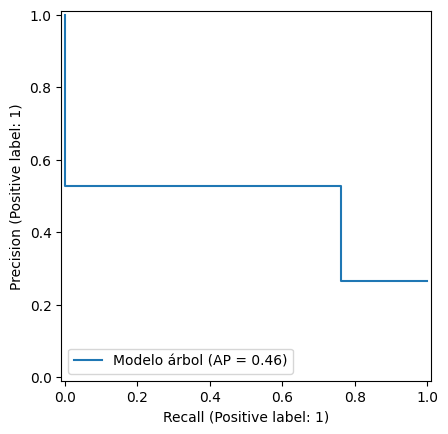

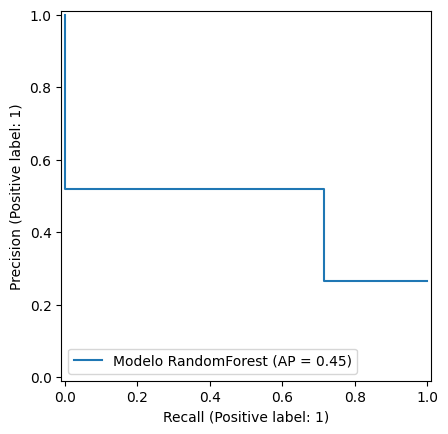

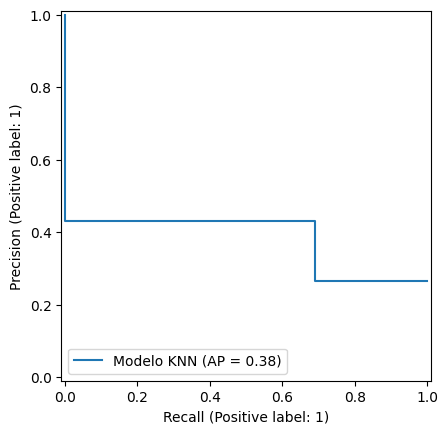

In [16]:
y_pred = modelo_arbol.predict(X_val)
PrecisionRecallDisplay.from_predictions(y_val, y_pred, name='Modelo √°rbol')
plt.show()

y_pred = modelo_forest.predict(X_val)
PrecisionRecallDisplay.from_predictions(y_val, y_pred, name='Modelo RandomForest')
plt.show()

y_pred = knn.predict(X_val_normalize)
PrecisionRecallDisplay.from_predictions(y_val, y_pred, name='Modelo KNN')
plt.show()

* ¬øCu√°l modelo tuvo el mejor desempe√±o?

El modelo que mostr√≥ un mejor desempe√±o en 'accuracy' fue el modelo RandomForest, mientras que el peor fue el modelo KNN, inclusive peor que el modelo utilizado como baseline (**DummyClassifier**).

* ¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

Todos los modelos presentaron overfitting, siendo el modelo KNN el mas afectado por ello, perdiendo un 18% de su capacidad predictiva, lo que indica que se ajusto demasiado a los datos de entrenamiento y generaliz√≥ mal en datos no vistos.



---

Sin embargo, estamos teniendo en cuenta la metrica 'accuracy', recordemos que la misma se encarga de evaluar cuantas predicciones correctas tuvo sobre el total de elementos. Dado el problema del desafio, donde lo que nos interesa es realmente tener una mejor capacidad predictiva sobre aquellos clientes que desertaron (Churn), no es la metrica en la que debemos enfocarnos, sino en 'Recall' (Sensibilidad).

En esta metrica, el que mejor rendimiento tuvo fue el modelo KNN, clasificando correctamente un 69% de estos casos, mientras que el modelo de √°rbol fue el peor, con un 51% de predicciones correctas sobre el total de casos Churn.

Esto muestra que, aunque KNN fue el modelo con menor *accuracy*, es el modelo que mejor cumple con el objetivo: identificar a los clientes que probablemente deserten. Por tanto, dependiendo de la prioridad del problema, KNN podr√≠a considerarse el modelo m√°s √∫til, a pesar de su menor desempe√±o general.


---



# 14. An√°lisis de la Importancia de las Variables/Optimizaci√≥n de parametros

## Modelo RandomForestClassifier()

In [17]:
# Convertimos X_train_smote y X_val a df para seleccionar las features
X_train_smote_df = pd.DataFrame(X_train_smote, columns=df_codificado.drop(columns='Churn', axis=1).columns)
X_val_df = pd.DataFrame(X_val, columns=df_codificado.drop(columns='Churn', axis=1).columns)

importancias = modelo_forest.feature_importances_
ft_importances = pd.DataFrame({'Features': df_codificado.drop(columns='Churn', axis=1).columns,
                               'Importancia': (importancias*100).round(2)}).sort_values('Importancia', ascending=False)

print(ft_importances)

model_features = RandomForestClassifier(n_estimators = 50, min_samples_leaf=3, min_samples_split=5, max_depth=2, random_state=82)

resultados = pd.DataFrame(index=['Accuracy', 'F1', 'Recall', 'Precision'])

ct_features = [i for i in range(1, 29)]

for i in ct_features:
    selected_features = ft_importances['Features'].values[:i]
    X_train_sel = X_train_smote_df[selected_features]
    X_val_sel = X_val_df[selected_features]
    model_features.fit(X_train_sel, y_train_smote) # Fit on the resampled training data
    y_previsto = model_features.predict(X_val_sel)
    metricas = calcularMetricas(y_val, y_previsto) # Evaluate on the original test data
    resultados[i] = list(metricas.values())


print(resultados)

                                             Features  Importancia
16             onehotencoder__tipo_contrato_mes a mes        26.36
19      onehotencoder__metodo_pago_cheque electr√≥nico        12.77
15              onehotencoder__tipo_contrato_dos a√±os         9.28
23                              remainder__antiguedad         8.31
7       onehotencoder__servicio_internet_Fibra optica         7.09
18                onehotencoder__factura_digital_True         5.21
17                onehotencoder__tipo_contrato_un a√±o         4.19
2                    onehotencoder__tiene_pareja_True         3.41
12       onehotencoder__servicio_soporte_tecnico_True         3.35
25                            remainder__cargos_total         2.65
3              onehotencoder__tiene_dependientes_True         2.52
26                         remainder__cuentas_diarias         2.39
9              onehotencoder__servicio_seguridad_True         2.39
24                           remainder__cargo_mensual      

‚úÖ 10 features parece ser lo mas optimo, puesto que tenemos un buen puntaje en recall y mantenemos un buen puntaje en accuracy

In [18]:
forest_features = ft_importances['Features'].values[:10]
X_selected_features = df_codificado[forest_features]

## Segmentando datos para RandomForest()

In [19]:
# segmentando nuevamente los datos con las mejores features
X_temp, X_test, y_temp, y_test = train_test_split(X_selected_features, y, stratify=y, random_state=82, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, random_state=82, test_size=0.2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [20]:
forest = RandomForestClassifier(n_estimators = 50, min_samples_leaf=3, min_samples_split=5, max_depth=2, random_state=82)
forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50, random_state=82)

In [21]:
print(forest.score(X_train_smote, y_train_smote))
print(forest.score(X_test, y_test))

0.7963075060532687
0.7348969438521677


## Optimizando hiperparametros, RandomForest()

In [22]:
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Para RandomForest
grid_forest = GridSearchCV(RandomForestClassifier(random_state=82), param_grid_forest, cv=stratkf, scoring='recall')
grid_forest.fit(X_train_smote, y_train_smote)

print(grid_forest.best_params_)

best_forest = grid_forest.best_estimator_

best_forest.fit(X_train_smote, y_train_smote)


y_pred = best_forest.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'Accuracy': 0.7751, 'F1': 0.6442, 'Recall': 0.7659, 'Precision': 0.5558}


Opte por modificar manualmente los parametros del modelo RandomForest porque no quede conforme con los resultados dados por GridSearchCV

In [23]:
# Ajuste manual de parametros para el modelo forest
forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf=1, min_samples_split=2, max_depth=2, random_state=82)
forest.fit(X_train_smote, y_train_smote)

# calculamos las metricas de evaluaci√≥n
y_pred = forest.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'Accuracy': 0.7298, 'F1': 0.6228, 'Recall': 0.8395, 'Precision': 0.4951}


## Modelo DecisionTreeClassifier()

In [24]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=82)

# Balanceo de clases

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [25]:
importancias = modelo_arbol.feature_importances_
ft_importances = pd.DataFrame({'Features': df_codificado.drop(columns='Churn', axis=1).columns,
                               'Importancia': (importancias*100).round(2)}).sort_values('Importancia', ascending=False)

print(ft_importances)

model_features = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2)

resultados = pd.DataFrame(index=['Accuracy', 'F1', 'Recall', 'Precision'])

ct_features = [i for i in range(1, 29)]
print(ct_features)

for i in ct_features:
    selected_features = ft_importances['Features'].values[:i]
    X_train_sel = X_train_smote_df[selected_features]
    X_val_sel = X_val_df[selected_features]
    model_features.fit(X_train_sel, y_train_smote) # Fit on the resampled training data
    y_previsto = model_features.predict(X_val_sel)
    metricas = calcularMetricas(y_val, y_previsto) # Evaluate on the original test data
    resultados[i] = list(metricas.values())


print(resultados)

                                             Features  Importancia
16             onehotencoder__tipo_contrato_mes a mes        61.09
19      onehotencoder__metodo_pago_cheque electr√≥nico        19.82
7       onehotencoder__servicio_internet_Fibra optica         5.80
23                              remainder__antiguedad         4.47
26                         remainder__cuentas_diarias         2.53
17                onehotencoder__tipo_contrato_un a√±o         2.27
25                            remainder__cargos_total         2.26
15              onehotencoder__tipo_contrato_dos a√±os         1.27
9              onehotencoder__servicio_seguridad_True         0.46
24                           remainder__cargo_mensual         0.02
0                     onehotencoder__genero_masculino         0.00
10                onehotencoder__servicio_backup_True         0.00
8                 onehotencoder__servicio_internet_No         0.00
5                onehotencoder__multiples_lineas_True      

‚úÖ 6 Features parece ser lo mas optimo, puesto que tenemos un buen recall (77.54%) y no perdemos demasiado con las otras metricas.

## Segmentando datos para DecisionTree()

In [26]:
tree_features = ft_importances['Features'].values[:6]
X_selected_features = df_codificado[tree_features]

In [27]:
# segmentando nuevamente los datos con las mejores features
X_temp, X_test, y_temp, y_test = train_test_split(X_selected_features, y, stratify=y, random_state=82, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, random_state=82, test_size=0.2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [28]:
modelo_arbol = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2)
modelo_arbol.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=82)

In [29]:
print(modelo_arbol.score(X_train_smote, y_train_smote))
print(modelo_arbol.score(X_test, y_test))

0.7911622276029056
0.7412935323383084


## Optimizando hiperparametros, DecisionTree()

In [30]:
param_grid_tree = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Para DecisionTree
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=82), param_grid_tree, cv=stratkf, scoring='recall')
grid_tree.fit(X_train_smote, y_train_smote)

print(grid_tree.best_params_)

best_tree = grid_tree.best_estimator_

best_tree.fit(X_train_smote, y_train_smote)

# metricas, mejores estimadores de gridsearchcv

y_pred = best_tree.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'Accuracy': 0.7413, 'F1': 0.6094, 'Recall': 0.7592, 'Precision': 0.509}


‚úÖ Opte por modificar el parametro max_depth, lo crei necesario para obtener un mejor rendimiento

In [31]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2)
modelo_arbol.fit(X_train_smote, y_train_smote)

y_pred = modelo_arbol.predict(X_val)
print(calcularMetricas(y_val, y_pred))

{'Accuracy': 0.7529, 'F1': 0.6371, 'Recall': 0.8161, 'Precision': 0.5225}


## Modelo KNeighborsClassifier()

In [32]:
columnas = df_codificado.drop('Churn', axis=1).columns
X_train_normalize_df = pd.DataFrame(X_train_normalize, columns=columnas)
X_test_normalize_df = pd.DataFrame(X_test_normalize, columns=columnas)

In [33]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=82, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=82)

# Balanceo de clases

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [34]:
importancias_knn = permutation_importance(knn, X_train_normalize, y_train_smote, n_repeats=30, random_state=82, n_jobs=-1, scoring='recall')
importancias_df = pd.DataFrame({
    'Features': columnas,
    'Importancia': importancias_knn.importances_mean
}).sort_values('Importancia', ascending=False)

print(importancias_df)

knn_feature = KNeighborsClassifier()

resultados = pd.DataFrame(index=['Accuracy', 'F1', 'Recall', 'Precision'])

# Evaluar desde 1 hasta todas las features
for i in range(1, len(importancias_df)+1):
    selected_features = importancias_df['Features'].values[:i]

    X_train_sel = X_train_normalize_df[selected_features]
    X_test_sel = X_test_normalize_df[selected_features]

    knn_feature.fit(X_train_sel, y_train_smote)
    y_pred = knn_feature.predict(X_test_sel)

    metricas = calcularMetricas(y_val, y_pred)
    resultados[i] = list(metricas.values())

# Mostrar resultados
print(resultados.T)

                                             Features  Importancia
23                              remainder__antiguedad     0.039508
0                     onehotencoder__genero_masculino     0.028967
5                onehotencoder__multiples_lineas_True     0.026594
25                            remainder__cargos_total     0.024189
18                onehotencoder__factura_digital_True     0.022252
2                    onehotencoder__tiene_pareja_True     0.017159
9              onehotencoder__servicio_seguridad_True     0.015359
3              onehotencoder__tiene_dependientes_True     0.011445
10                onehotencoder__servicio_backup_True     0.011429
1                     onehotencoder__es_jubilado_True     0.010210
4             onehotencoder__servicio_telefonico_True     0.009903
11            onehotencoder__servicio_proteccion_True     0.008410
14            onehotencoder__streaming_peliculas_True     0.007934
26                         remainder__cuentas_diarias     0.00

‚úÖ 19 features parece ser el numero optimo de features para el modelo knn

In [35]:
knn_features = importancias_df['Features'].values[:19]

In [36]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1=manhattan, 2=euclidean
}


# Para KNeighbors
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=stratkf, scoring='recall')
grid_knn.fit(X_train_normalize, y_train_smote)

print(grid_knn.best_params_)


best_knn = grid_knn.best_estimator_


best_knn.fit(X_train_normalize, y_train_smote)



y_pred = best_knn.predict(X_val_normalize)
print(calcularMetricas(y_val, y_pred))

{'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
{'Accuracy': 0.683, 'F1': 0.5661, 'Recall': 0.7781, 'Precision': 0.445}


# 15. Modelos finales

## RandomForestClassifier()

In [37]:
X_selected_features = df_codificado[forest_features] # del df codificado, seleccionamos las mejores features para el modelo RandomForest

champion_forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf=1, min_samples_split=2, max_depth=2, random_state=82) # instanciamos un modelo randomforest parametrizado

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=82, test_size=0.2, stratify=y) # dividimos los datos

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # hacemos oversampling solo al conjunto de entrenamiento

champion_forest.fit(X_train_smote, y_train_smote) # entrenamos el modelo con el conjunto de entrenamiento oversampleado

y_pred = champion_forest.predict(X_test)

print(calcularMetricas(y_test, y_pred)) # metricas de evaluaci√≥n del modelo random forest

{'Accuracy': 0.7107, 'F1': 0.5974, 'Recall': 0.8075, 'Precision': 0.4741}


## DecisionTreeClassifier()

In [38]:
X_selected_features = df_codificado[tree_features] # del df codificado seleccionamos las mejores features para el modelo DecisionTree

champion_tree = DecisionTreeClassifier(max_depth=5 ,random_state=82, min_samples_leaf=1, min_samples_split=2) # instanciamos un modelo de arbol parametrizado

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=82, test_size=0.2, stratify=y) # dividimos los datos en entrenamiento y prueba

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # oversampleamos el conjunto de entrenamiento

champion_tree.fit(X_train_smote, y_train_smote) # entrenamos el modelo

y_pred = champion_tree.predict(X_test)

print(calcularMetricas(y_test, y_pred)) # metricas de evaluacion del modelo arbol

{'Accuracy': 0.7363, 'F1': 0.6171, 'Recall': 0.7995, 'Precision': 0.5025}


## KNeighborsClassifier()

In [39]:
X_selected_features = df_codificado[knn_features] # seleccionamos del df codificado las mejores features para el modelo knn

champion_knn = grid_knn.best_estimator_ # de gridknn obtenemos el mejor estimador

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=82, test_size=0.2, stratify=y) # dividimos los datos

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train) # oversampleamos el conjunto de entrenamiento

X_train_normalize = normalizacion.fit_transform(X_train_smote) # normalizamos el conjunto de entrenamiento
X_test_normalize = normalizacion.transform(X_test) # normalizamos el conjunto de prueba

champion_knn.fit(X_train_normalize, y_train_smote) # entrenamos el modelo con los datos normalizados y oversampleados

y_pred = champion_knn.predict(X_test_normalize) # hacemos una prediccion con el conjunto de prueba

print(calcularMetricas(y_test, y_pred)) # metricas de evaluaci√≥n del modelo knn

{'Accuracy': 0.6923, 'F1': 0.5622, 'Recall': 0.7433, 'Precision': 0.452}


# 16. Informe

El siguiente informe fue realizado con el objetivo de presentar un analisis detallado de aquellos factores que tienen un impacto mayor en la cancelaci√≥n de clientes de la empresa 'Telecom X'.

Por medio de modelos predictivos, se logro asociar que caracteristicas del cliente estan directamente asociadas con el abandono del servicio. Los resultados permiten no solo comprender mejor el perfil del cliente en riesgo, sino tambi√©n proponer acciones concretas para mejorar la retenci√≥n, tales como modificaciones en el tipo de contrato, servicios adicionales y ajustes tarifarios.

---

## üéØ RandomForestClassifier():

Para el modelo RandomForestClassifier(), se utilizo la propiedad `feature_importances_`, que se refiere a la importancia de cada variable (feature) usada para la construcci√≥n del modelo. Esta m√©trica se basa en la reducci√≥n del criterio de impureza (por ejemplo, Gini o entrop√≠a) que cada variable aporta al dividir los nodos en los √°rboles. En otras palabras, refleja cu√°nto contribuye cada variable a mejorar la capacidad predictiva del modelo.

Este enfoque permite identificar qu√© variables fueron m√°s determinantes a la hora de predecir si un cliente cancelar√° o no el servicio, lo cual resulta clave para orientar las estrategias de retenci√≥n.

Las variables seleccionadas que mostraron mayor relevancia en la cancelaci√≥n para este modelo fueron:

| Feature                                                | Importancia |
|--------------------------------------------------------|-------------|
| onehotencoder__tipo_contrato_mes a mes                | 26.36       |
| onehotencoder__metodo_pago_cheque electr√≥nico         | 12.77       |
| onehotencoder__tipo_contrato_dos a√±os                 | 9.28        |
| remainder__antiguedad                                 | 8.31        |
| onehotencoder__servicio_internet_Fibra optica         | 7.09        |
| onehotencoder__factura_digital_True                   | 5.21        |
| onehotencoder__tipo_contrato_un a√±o                   | 4.19        |
| onehotencoder__tiene_pareja_True                      | 3.41        |
| onehotencoder__servicio_soporte_tecnico_True          | 3.35        |
| remainder__cargos_total                               | 2.65        |


Donde:


*   `onehotencoder__tipo_contrato_mes a mes`: Refiere al tipo de contrato 'Mes a mes'.
*   `onehotencoder__metodo_pago_cheque electr√≥nico`: Refiere al m√©todo de pago 'Cheque electronico'.
*   `onehotencoder__tipo_contrato_dos a√±os`: Refiere al tipo de contrato 'dos a√±os'.
*   `remainder__antiguedad`: Refiere a la antiguedad del cliente (cuanto tiempo lleva usando los servicios).
*   `onehotencoder__servicio_internet_Fibra optica`: Refiere a 'Fibra optica' como el tipo de servicio de internet ofrecido.
*   `onehotencoder__factura_digital_True`: Indica si el cliente recibe su factura de manera digital o no.
*   `onehotencoder__tipo_contrato_un a√±o`: Refiere al tipo de contrato 'un a√±o'.
*   `onehotencoder__tiene_pareja_True`: Indica si el cliente tiene o no pareja.
*   `onehotencoder__servicio_soporte_tecnico_True`: Indica si el cliente cuenta con el servicio de soporte tecnico o no.
*   `remainder__cargos_total`: Cargos totales realizados al cliente hasta la fecha.


Esto indica que tanto las condiciones contractuales, como la duraci√≥n del contrato, el m√©todo de pago, etc., asi como el monto total cobrado al cliente hasta la fecha son clave para determinar la decisi√≥n de abandono del cliente.

---

## üìä Factores mas influyentes:

A partir del analisis de importancia de las variables utilizando el modelo RandomForestClassifier(), se identificaron que factores son los mas influyentes en la probabilidad de cancelaci√≥n del servicio por parte de los clientes:


### 1. Tipo de contrato:
Los tipos de contrato `mes a mes` se asocian con una mayor probabilidad de cancelaci√≥n, probablemente se deba a que no requiere un compromiso a largo plazo, permitiendo asi al cliente abandonar facilmente el servicio.
En cambio, contratos como los de `un a√±o` o `dos a√±os` reducen la probabilidad de cancelaci√≥n, debido a que requieren un mayor compromiso a largo plazo, ademas de venir acompa√±ados por descuentos o beneficios adicionales.

### 2. M√©todo de pago:

El m√©todo de pago `cheque electr√≥nico` esta relacionado con una mayor probabilidad de cancelaci√≥n. Podria deberse a clientes menos familiarizados con los m√©todos de pago mas actuales, teniendo una experiencia de pago menos eficiente.

### 3. Tipo de servicio de internet:

Los clientes con `fibra √≥ptica` como tipo de servicio de internet presentan una mayor tasa de cancelaci√≥n. Puede deberse a que es un servicio mas costoso, o tambien, dependiendo de la zona, puede presentar problemas de calidad, ofreciendo una mala experiencia para el usuario.

### 4. Relaciones personales:

Si el cliente tiene pareja, se relaciona con una mayor pertenencia, pudiendo deberse a que las decisiones de cancelar o no un servicio sean mas consideradas y menos impulsivas.

### 5. Antig√ºedad del cliente:

Los clientes con menor antig√ºedad presentan mayor probabilidad de cancelar el servicio. Tiene sentido, puesto que un cliente nuevo puede estar explorando distintas opciones y aun no estan fidelizados con la marca.

### 6. Factura digital:

El hecho de recibir factura digital puede estar asociado a un perfil m√°s digitalizado, aunque el impacto directo en el churn es menor. Podr√≠a ser una variable que combina con otras para reflejar el nivel de satisfacci√≥n o comodidad con los canales de comunicaci√≥n.

### 7. Servicios adicionales:

Contar con servicio de `soporte t√©cnico` reduce la probabilidad de cancelaci√≥n, sugiriendo que los clientes que reciben soporte cuando lo necesiten tienen una mejor experiencia, y por ende, mayor probabilidad de permanencia.

### 8. Cargos totales:

Los cargos totales acumulados por el cliente se relacionan con el tiempo como cliente y el tipo de servicios contratados. Valores m√°s altos podr√≠an estar asociados a mayor permanencia, pero tambi√©n a una percepci√≥n negativa si el cliente considera que los costos superan los beneficios, especialmente si no recibe servicios adicionales.

---

## ü§ù Estrategias de retenci√≥n:

A partir de los factores m√°s relevantes que influyen en la cancelaci√≥n de clientes, se proponen las siguientes estrategias orientadas a mejorar la retenci√≥n y reducir la tasa de churn. Estas acciones est√°n dise√±adas para anticiparse al abandono, mejorar la experiencia del cliente y aumentar su fidelizaci√≥n.


### 1. Tipo de contrato:
Teniendo en cuenta que los contratos `mes a mes` son los que suponen una mayor probabilidad de cancelaci√≥n, se proponen las siguientes estrategias:

* Incentivar contratos a largo plazo, ofreciendo descuentos los primeros meses del contrato, beneficios exclusivos (servicio de soporte t√©cnico, mayor velocidad de internet, servicio de streaming, etc).

* Implementar campa√±as de fidelizaci√≥n a clientes con baja antig√ºedad que a√∫n no hayan renovado su contrato.

### 2. M√©todo de pago:
El `cheque electr√≥nico` se asocia a mayor probabilidad de cancelaci√≥n, por ello, se puede seguir la siguiente estrategia:

* Fomentar el uso de m√©todos de pago digitales o autom√°ticos (d√©bito autom√°tico, billeteras virtuales) con bonificaciones, descuentos, etc.

* Identificar clientes que usan cheque electr√≥nico y ofrecer asistencia para cambiar a m√©todos digitales m√°s c√≥modos y seguros.

### 3. Fibra √≥ptica:
Clientes con `fibra √≥ptica` tienen una mayor probabilidad de cancelaci√≥n, las estrategias a seguir pueden ser las siguientes:

* Detectar clientes que posean este servicio que hayan realizado quejas recientemente o tengas llamadas al soporte.

* Ofrecer ajustes personalizados (descuentos temporales, mejoras de plan) a clientes que se encuentren insatisfechos con el servicio ofrecido.

### 4. Servicio de soporte t√©cnico:
No tener `soporte t√©cnico` se relaciona directamente con mayor tasa de Churn.

* Promocionar el valor del soporte t√©cnico en las comunicaciones con los clientes.

* Ofrecerlo como bonificaci√≥n temporal a clientes nuevos o en riesgo de cancelaci√≥n.

### 5. Clientes nuevos:
La menor `antig√ºedad` se relaciona con una mayor probabilidad de cancelaci√≥n.

* Crear un programa de onboarding que incluya recomendaciones y beneficios para los primeros meses.

* Enviar encuestas de satisfacci√≥n personalizadas y realizar seguimientos cada mes para anticipar la cancelaci√≥n.

### 6. Clientes con altos cargos totales:
Altos cargos acumulados pueden llegar a generar una percepci√≥n negativa si no se acompa√±a de valor percibido.

* Implementar un programa de fidelizaci√≥n que recompense a estos clientes con mejoras de plan o regalos.

* Identificar clientes con cargos elevados pero sin servicios adicionales y ofrecerles bundles promocionales.


Estas estrategias apuntan a actuar sobre los puntos cr√≠ticos que m√°s afectan la permanencia del cliente. Implementarlas permitir√° no solo reducir el churn, sino tambi√©n mejorar la experiencia general del cliente, lo que se traduce en mayor fidelizaci√≥n y valor a largo plazo.

---
## üéØ DecisionTreeClassifier()

Para el modelo DecisionTreeClassifier(), al igual que con el modelo anterior, se hizo uso de la propiedad `feature_importances_` para averiguar la importancia de cada feature dentro del modelo.

Las variables con mayor importancia para este modelo son:


| Feature                                               | Importancia |
|-------------------------------------------------------|-------------|
| onehotencoder__tipo_contrato_mes a mes               | 61.09       |
| onehotencoder__metodo_pago_cheque electr√≥nico        | 19.82       |
| onehotencoder__servicio_internet_Fibra optica        | 5.80        |
| remainder__antiguedad                                | 4.47        |
| remainder__cuentas_diarias                           | 2.53        |
| onehotencoder__tipo_contrato_un a√±o                  | 2.27        |

Donde:

* `onehotencoder__tipo_contrato_mes a mes`: Los clientes con contrato mensual tienen mayor probabilidad de cancelar, posiblemente porque no tienen compromiso a largo plazo.

* `onehotencoder__metodo_pago_cheque electr√≥nico` : Este m√©todo de pago puede estar relacionado con una experiencia de usuario menos conveniente, lo que podr√≠a elevar el riesgo de churn.

* `onehotencoder__servicio_internet_Fibra optica` : La calidad del servicio (Fibra √≥ptica vs. otras opciones) puede influir en la satisfacci√≥n del cliente. Este factor podr√≠a indicar exigencias m√°s altas.

* `remainder__antiguedad` : Clientes m√°s nuevos tienden a cancelar m√°s r√°pido, indicando problemas de onboarding o falta de fidelizaci√≥n temprana.

* `remainder__cuentas_diarias` : Refleja la frecuencia de uso o interacci√≥n. Una menor cantidad de operaciones puede estar asociada a desinter√©s o falta de necesidad del servicio.

* `onehotencoder__tipo_contrato_un a√±o` : Contratos anuales ofrecen mayor estabilidad; sin embargo, algunos clientes en este segmento a√∫n deciden cancelar, posiblemente tras el primer a√±o.

---

## üìä Factores mas influyentes:

### 1. Tipo de contrato:

El tipo de contrato mensual es el que m√°s peso tiene en la predicci√≥n del churn. Su alta flexibilidad parece asociarse con una menor fidelizaci√≥n del cliente. Al no tener compromisos a largo plazo, los usuarios pueden cancelar el servicio en cualquier momento sin penalizaciones.

En contraparte, el contrato anual ofrece un compromiso mayor que los contratos mensuales, no obstante, en ciertos casos el cliente puede optar por abandonar el servicio de todos modos, lo que daria lugar a explorar opciones que puedan mejorar la experiencia del usuario durante el a√±o.

### 2. M√©todo de pago:

Los clientes que pagan con cheque electr√≥nico presentan una mayor tendencia a cancelar. Esto puede estar relacionado con una experiencia de pago menos √°gil o con un perfil m√°s tradicional que podr√≠a implicar menos tolerancia a cambios o problemas t√©cnicos.

### 3. Fibra √≥ptica:

La fibra √≥ptica, a pesar de ofrecer mejor velocidad, podr√≠a generar expectativas m√°s altas. Si no se cumplen (por fallas, soporte deficiente u otros factores), esto podr√≠a derivar en insatisfacci√≥n y cancelaci√≥n.

### 4. Antig√ºedad:

Los clientes con menor antig√ºedad son m√°s propensos a abandonar el servicio. Esto podr√≠a reflejar una experiencia inicial insatisfactoria o la falta de incentivos para mantener el servicio durante los primeros meses.

### 5. Cuentas diarias:

Una menor frecuencia de uso (representada por pocas cuentas diarias asociadas al servicio) podr√≠a ser un indicador de que el cliente no encuentra el servicio lo suficientemente √∫til, y por ende, decide cancelarlo.

---

## ü§ù Estrategias de retenci√≥n:

### üìù 1. Reformular las condiciones del contrato ‚Äúmes a mes‚Äù
Por qu√©: Es el factor m√°s influyente en el abandono.

Estrategia: Ofrecer incentivos a los clientes con este tipo de contrato para que migren a planes anuales o bianuales. Por ejemplo:

* Descuentos exclusivos.

* Beneficios adicionales (mejor ancho de banda, soporte prioritario).

* Programas de fidelidad con recompensas por permanencia.

### üí≥ 2. Optimizar el m√©todo de pago con cheque electr√≥nico
Por qu√©: Se asocia con una mayor probabilidad de cancelaci√≥n.

Estrategia:

* Promover m√©todos de pago m√°s √°giles y digitales (d√©bito autom√°tico, billeteras virtuales).

* Implementar una comunicaci√≥n espec√≠fica para estos clientes, ofreciendo tutoriales o asistencia para migrar a m√©todos modernos.

* Ofrecer beneficios exclusivos por cambiar el m√©todo de pago.

### üåê 3. Mejorar la experiencia del cliente con fibra √≥ptica
Por qu√©: A pesar de ser un servicio premium, est√° relacionado con mayor churn.

Estrategia:

* Asegurar que la instalaci√≥n y funcionamiento inicial sean impecables.

* Proveer seguimiento personalizado durante los primeros meses.

* Ofrecer soporte t√©cnico proactivo ante la detecci√≥n de fallas.

### ‚è≥ 4. Acompa√±amiento durante los primeros meses de servicio
Por qu√©: Los clientes con baja antig√ºedad tienden a cancelar m√°s.

Estrategia:

* Crear una campa√±a de onboarding que incluya seguimiento los primeros 90 d√≠as.

* Enviar encuestas de satisfacci√≥n temprana y resolver problemas r√°pidamente.

* Incentivar la permanencia con promociones temporales o upgrades autom√°ticos.

### üìâ 5. Incentivar el uso del servicio
Por qu√©: Menor n√∫mero de cuentas diarias puede reflejar poco compromiso con el servicio.

Estrategia:

* Detectar usuarios con baja actividad y ofrecer contenido personalizado, recomendaciones o funcionalidades nuevas.

* Promocionar funcionalidades poco utilizadas para aumentar el engagement.

* Incorporar notificaciones inteligentes que fomenten el uso regular.

### üìÜ 6. Revisar condiciones del contrato anual
Por qu√©: Aunque no tan cr√≠tico como el mensual, tambi√©n est√° presente entre los factores de churn.

Estrategia:

* Evaluar si las condiciones del contrato anual son lo suficientemente atractivas.

* Ofrecer mejoras o renovaciones anticipadas para evitar cancelaciones al final del per√≠odo.

---
## üéØ KNeighborsClassifier()

Para el modelo KNeighborsClassifier(), se utiliz√≥ el m√©todo `permutation_importance` para identificar las variables mas influyentes en la predicci√≥n de cancelaci√≥n. Este m√©todo mide la ca√≠da en el rendimiento del modelo cuando los valores de cada variable se permutan aleatoriamente. Cuanto mayor es la disminuci√≥n en el desempe√±o, mayor es la relevancia de esa variable para el modelo.

Las variables seleccionadas que mostraron mayor relevancia en la cancelaci√≥n para este modelo fueron:

| Feature                                              | Importancia |
|------------------------------------------------------|-------------|
| remainder__antiguedad                               | 0.039508    |
| onehotencoder__genero_masculino                     | 0.028967    |
| onehotencoder__multiples_lineas_True                | 0.026506    |
| remainder__cargos_total                              | 0.024159    |
| onehotencoder__factura_digital_True                 | 0.022125    |
| onehotencoder__tiene_pareja_True                    | 0.017159    |
| onehotencoder__servicio_seguridad_True              | 0.013559    |
| onehotencoder__tiene_dependientes_True              | 0.011445    |
| onehotencoder__servicio_backup_True                 | 0.011429    |
| onehotencoder__es_jubilado_True                     | 0.010210    |
| onehotencoder__servicio_telefonico_True             | 0.009909    |
| onehotencoder__servicio_proteccion_True             | 0.009090    |
| onehotencoder__streaming_peliculas_True             | 0.007934    |
| remainder__cuentas_diarias                          | 0.007546    |
| onehotencoder__streaming_tv_True                    | 0.006118    |
| remainder__cargo_mensual                            | 0.005779    |
| onehotencoder__servicio_soporte_tecnico_True        | 0.005416    |
| onehotencoder__tipo_contrato_dos a√±os               | 0.000121    |
| onehotencoder__tipo_contrato_un a√±o                 | -0.000630   |

Donde:

* `remainder__antiguedad` : La antig√ºedad del cliente fue la variable m√°s importante, lo que sugiere que los clientes nuevos tienen mayor riesgo de cancelaci√≥n.

* `onehotencoder__genero_masculino` y `onehotencoder__multiples_lineas_True`: Estas variables indican caracter√≠sticas demogr√°ficas o del servicio que podr√≠an estar asociadas con patrones de cancelaci√≥n.

* `remainder__cargos_total`: El total facturado a lo largo del tiempo parece influir en la permanencia, posiblemente relacionado con la percepci√≥n del valor recibido.

* `onehotencoder__factura_digital_True` y `onehotencoder__tiene_pareja_True`: Estas variables sugieren que aspectos personales o del canal de comunicaci√≥n impactan en el engagement del cliente.

Servicios adicionales como:

* `servicio_seguridad_True`

* `servicio_backup_True`

* `servicio_telefonico_True`

* `servicio_proteccion_True`

muestran influencia en menor medida, lo que sugiere que su contrataci√≥n puede estar asociada a una menor probabilidad de cancelaci√≥n.

---

## üìä Factores mas influyentes:

El an√°lisis mediante `permutation_importance` revel√≥ cu√°les son las variables que m√°s afectan la probabilidad de que un cliente cancele el servicio. A continuaci√≥n, se interpretan las principales variables desde una perspectiva de negocio:

* `remainder__antiguedad` : La antig√ºedad fue la variable m√°s influyente en el modelo. Los clientes con menos tiempo de permanencia tienen mayor probabilidad de cancelar, lo que indica que los primeros meses son cr√≠ticos para fidelizar al cliente.

* `onehotencoder__genero_masculino`: Aunque el g√©nero no suele ser un factor determinante por s√≠ solo, puede estar actuando como una variable proxy para cierto tipo de comportamiento de consumo. Es posible que haya patrones diferentes en la decisi√≥n de cancelar entre g√©neros que valdr√≠a la pena explorar m√°s a fondo.

* `onehotencoder__multiples_lineas_True`: Los clientes con m√°s de una l√≠nea pueden tener una mayor vinculaci√≥n con el servicio, aunque tambi√©n puede reflejar mayor complejidad y potenciales problemas t√©cnicos, lo que podr√≠a llevar a la cancelaci√≥n si no se gestionan bien.

* `remainder__cargos_total` : Altos cargos acumulados podr√≠an generar una percepci√≥n negativa del valor recibido, especialmente si no est√°n acompa√±ados de beneficios tangibles. Esto puede motivar al cliente a buscar alternativas m√°s econ√≥micas.

* `onehotencoder__factura_digital_True` : Recibir factura digital puede estar vinculado a un perfil m√°s digitalizado o aut√≥nomo. Su impacto podr√≠a relacionarse con un menor contacto con la empresa, lo que puede influir en la desconexi√≥n o desinter√©s si no se complementa con una buena experiencia de usuario.

* `onehotencoder__tiene_pareja_True`, `onehotencoder__tiene_dependientes_True` : Clientes en pareja o con dependientes podr√≠an estar m√°s comprometidos con la estabilidad de servicios del hogar y menos propensos a cancelaciones impulsivas.

* `onehotencoder__servicio_seguridad_True`, `onehotencoder__servicio_backup_True` : Los servicios adicionales suelen generar mayor percepci√≥n de valor, y su contrataci√≥n se relaciona con menor tasa de cancelaci√≥n. Clientes que no los contratan pueden estar menos comprometidos o tener menor satisfacci√≥n general.

* `remainder__cargo_mensual` : Un cargo mensual alto puede estar asociado con mayor cancelaci√≥n si el cliente no percibe un valor equivalente. Sin embargo, no fue una de las variables m√°s influyentes, lo cual sugiere que el problema no es solo el precio, sino lo que se recibe a cambio.

---

## ü§ù Estrategias de retenci√≥n:

### 1. Clientes nuevos:

* Dise√±ar un programa de bienvenida para los primeros 90 d√≠as con beneficios exclusivos (bonificaciones, atenci√≥n prioritaria, tutoriales).

* Implementar encuestas de satisfacci√≥n tempranas y seguimiento personalizado en los primeros meses.


### 2. Percepci√≥n de costos elevados:

* Crear programas de fidelizaci√≥n para clientes con altos pagos acumulados (descuentos, upgrades, regalos).

* Enviar comunicaciones que resalten los beneficios incluidos en su plan, reforzando el valor percibido.

### 3. Servicios adicionales:

* Ofrecer periodos de prueba gratuitos para servicios como seguridad o backup.

* Realizar campa√±as de upselling inteligente, dirigidas a clientes que a√∫n no cuentan con estos servicios.

### 4. Pago y facturaci√≥n ‚Äì Fortalecer el v√≠nculo digital

* Enviar contenidos personalizados y recomendaciones junto con la factura digital (por ejemplo: "¬øsab√≠as que pod√©s agregar soporte t√©cnico?").

* Ofrecer m√°s canales de interacci√≥n digital (chatbots, asesor virtual) para mantener contacto con este perfil.


### 5. Clientes con multiples lineas

* Brindar asistencia t√©cnica proactiva a clientes con m√∫ltiples l√≠neas (monitoreo preventivo, ofertas de mantenimiento).

* Ofrecer descuentos por l√≠nea adicional o consolidaci√≥n de facturaci√≥n para facilitar la gesti√≥n del servicio.

## Conclusi√≥n
---
Durante el desarrollo del proyecto, se entrenaron y evaluaron tres modelos distintos para predecir el abandono de clientes (churn) en una empresa de telecomunicaciones: RandomForestClassifier, KNeighborsClassifier, y DecisionTreeClassifier. A continuaci√≥n, se resumen los principales hallazgos y aportes de cada modelo:

### üå≥ 1. Random Forest Classifier
* ‚úÖ Mejor rendimiento en sensibilidad (recall): Esto significa que fue el modelo m√°s efectivo para identificar correctamente a los clientes que abandonan, lo cual es crucial si el objetivo es anticiparse a las bajas.

* Importancia de variables (feature_importances_):

* *  Se destacaron especialmente el tipo de contrato, el m√©todo de pago, la antig√ºedad del cliente y el uso de servicio de internet (fibra √≥ptica).

* Ventajas:

* * Alto rendimiento general.

* * Robusto frente al desbalanceo de clases.

* * Capaz de capturar relaciones complejas entre variables.

* Aplicaci√≥n pr√°ctica:

* * Ideal para predecir abandono de manera confiable y tomar medidas preventivas a tiempo.

---


### üîç 2. KNeighborsClassifier

* Evaluaci√≥n mediante permutation_importance:

* * Variables como antig√ºedad, g√©nero, cantidad de l√≠neas, y factura digital resultaron influyentes.

* Ventajas:

* * Simplicidad y facilidad de implementaci√≥n.

* Desventajas:

* * Menor desempe√±o general, particularmente en recall.

* * Sensible a la escala de los datos y a la cantidad de caracter√≠sticas irrelevantes.

* Aplicaci√≥n pr√°ctica:

* * √ötil como modelo base o de comparaci√≥n, pero no el m√°s confiable para casos de churn.

### üå≤ 3. Decision Tree Classifier
* Interpretabilidad elevada:

* * Se identific√≥ con claridad que el contrato "mes a mes" es el principal factor de abandono (m√°s del 60% de importancia).

* * Otras variables importantes fueron el m√©todo de pago con cheque electr√≥nico, la fibra √≥ptica, y la antig√ºedad.

* Ventajas:

* * F√°cil de explicar a p√∫blicos no t√©cnicos.

* * Ofrece reglas claras para segmentar clientes.

* Desempe√±o:

* * Aceptable, pero no super√≥ al Random Forest en recall.

* Aplicaci√≥n pr√°ctica:

* * √ötil para dise√±ar campa√±as de retenci√≥n con base en reglas expl√≠citas.

### üèÜ Modelo elegido: Random Forest Classifier
Dado que el foco del an√°lisis es la detecci√≥n de clientes que probablemente abandonen (alta sensibilidad), el modelo de Random Forest es el m√°s adecuado. Su capacidad para detectar estos casos con mayor precisi√≥n lo convierte en la mejor herramienta para la toma de decisiones proactiva.

### üìå Conclusi√≥n estrat√©gica
* Los tres modelos coinciden en que las condiciones contractuales, la forma de pago y la antig√ºedad del cliente son los factores clave detr√°s del abandono.

* Estos resultados permiten enfocar las acciones de retenci√≥n en los siguientes ejes:

* * Clientes con contrato mes a mes.

* * Usuarios que pagan con cheque electr√≥nico.

* * Clientes nuevos o con baja antig√ºedad.

* Implementar pol√≠ticas orientadas a estos perfiles (bonificaciones, renovaci√≥n de contrato, promociones personalizadas) podr√≠a tener un alto impacto en la reducci√≥n del churn.